In [5]:
import numpy as np
import matplotlib.pyplot as plt
from ase.io import read
from matplotlib.lines import Line2D
import pandas as pd
from kaldo.phonons import Phonons
from kaldo.forceconstants import ForceConstants
from kaldo.observables.harmonic_with_q import HarmonicWithQ
from kaldo.helpers.storage import save
from kaldo.helpers.storage import get_folder_from_label as gfml
from kaldo.helpers.storage import DEFAULT_STORE_FORMATS
from scipy import constants as con
plt.style.use('/home/nwlundgren/spanners/configurations/nicholas.mplstyle')
prefix = '../silicon/'

2023-08-29 10:46:08.223012: I tensorflow/core/util/util.cc:169] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2023-08-29 10:46:08.226677: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /opt/intel/oneapi/mkl/2023.2.0/lib/intel64:/opt/intel/oneapi/compiler/2023.2.0/linux/lib:/opt/intel/oneapi/compiler/2023.2.0/linux/lib/x64:/opt/intel/oneapi/compiler/2023.2.0/linux/compiler/lib/intel64_lin
2023-08-29 10:46:08.226688: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.


In [2]:
# Utilities
def kaldo_reformat(prop_string, kaldo_obj, label='', nformat='numpy'):
    save(prop_string, gfml(kaldo_obj, label=label), kaldo_obj, format=nformat)
    
# Unit conversions
# THz to cm-1
thz_to_invcm = con.value('hertz-inverse meter relationship')*1e12/100

# Reformat davide's data

In [ ]:
# fcs = ForceConstants.from_folder(prefix+'davide-8x8x8/',
#             supercell=[8,8,8], format='shengbte-qe', only_second=True)
# ph = Phonons(forceconstants=fcs, kpts=[9,9,9], is_classic=False,
#         temperature=300, folder=fcs.folder, is_unfolding=True, storage='formatted')
# for prop in ['frequency', 'velocity']:
#     kaldo_reformat(prop, ph, label='', nformat='numpy')
# for prop in ['bandwidth', 'population', 'heat_capacity']:
#     kaldo_reformat(prop, ph, label='<temperature>/<statistics>', nformat='numpy')

# Plot Dispersion

Text(0.5, 1.0, 'Crystal Silicon Dispersion')

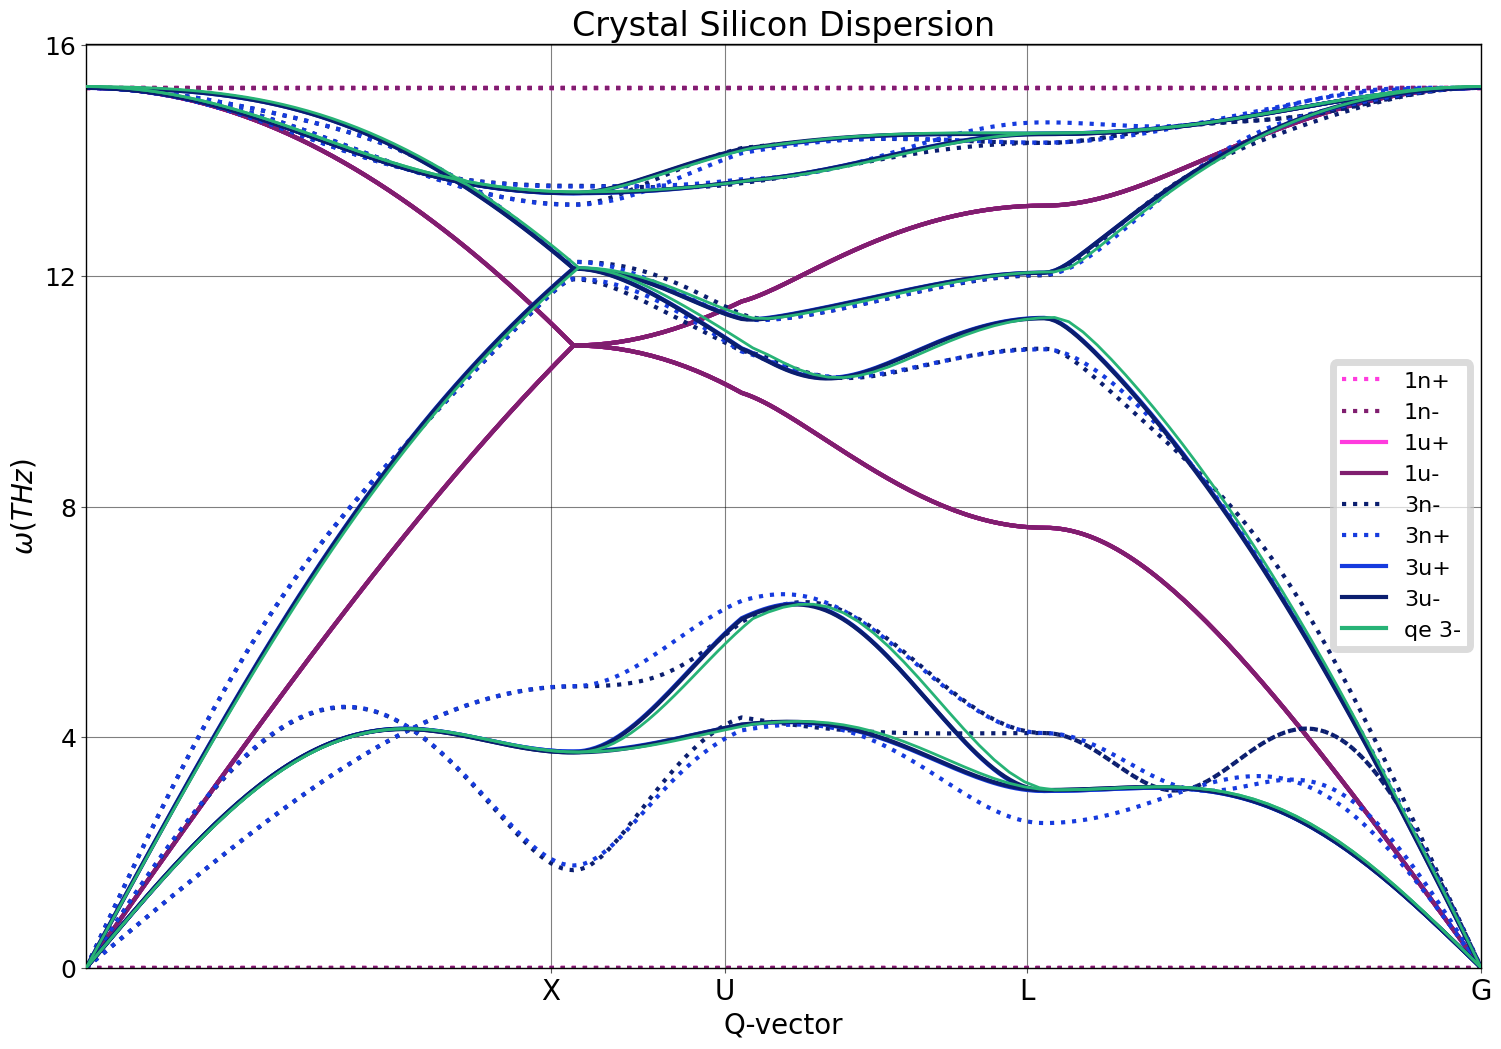

In [8]:
fig = plt.figure(figsize=(18,12))
ax = fig.add_subplot()

subfolder = 'plottable/'

styledic = {
    '1':np.array([255, 59, 222])/255,
    '3':np.array([22, 59, 222])/255,
    '8':np.array([255, 19, 3])/255,
    'u': '-',
    'n': ':',
    '+': 0,
    '-': 0.5,
}

lin = []; lab = []
for system in ['1n+', '1n-', '1u+','1u-','3n-', '3n+', '3u+', '3u-']:
    infold = prefix+subfolder+'/'+system+'/dispersion/'
    color = np.array(styledic[system[0]] * (1-styledic[system[2]]))
    ls = styledic[system[1]]
    
    # Load data
    q=np.loadtxt(infold+'q')
    bands=np.loadtxt(infold+'dispersion')
    
    # Plot
    ax.plot(q, bands, color=color, linestyle=ls, linewidth=3, label=system)
    lin.append(Line2D([], [], color=color, linestyle=ls, linewidth=3))
    lab.append(system)
    
color = '#27b376' # minty green
matdyn = np.loadtxt(prefix+'/3x3x3/silicon.freq.gp')
xmax = matdyn[:, 0].max()
ax.plot(matdyn[:, 0]/xmax, matdyn[:, 1:]/thz_to_invcm, color=color, lw=2, zorder=100)
lin.append(Line2D([], [], color=color, linestyle='-', linewidth=3, zorder=0))
lab.append('qe 3-')

ax.legend(lin, lab, loc='center right')
xlabels = np.loadtxt(infold+'point_names', dtype='str')
xticks = np.loadtxt(infold+'Q_val') - 0.02; xticks[-1] +=0.02
ax.set_yticks([0, 4, 8, 12, 16], [0, 4, 8, 12, 16], color='k', fontsize=18)
ax.set_xticks(xticks, xlabels, fontsize=20, color='k')
ax.grid('x', color='k', alpha=0.5, zorder=-1)
ax.grid('y', 'major', color='k', alpha=0.5, zorder=-1)
ax.set_xlabel('Q-vector', fontsize=20, color='k')
ax.set_ylabel(r'$\omega (THz)$', fontsize=20, color='k')
ax.set_xlim([0, 1])
ax.set_ylim([0, bands.max()*1.05])
ax.set_title('Crystal Silicon Dispersion', fontsize=24, color='k')


# Plot Velocities

Text(0.5, 1.0, 'Crystal Silicon Velocities')

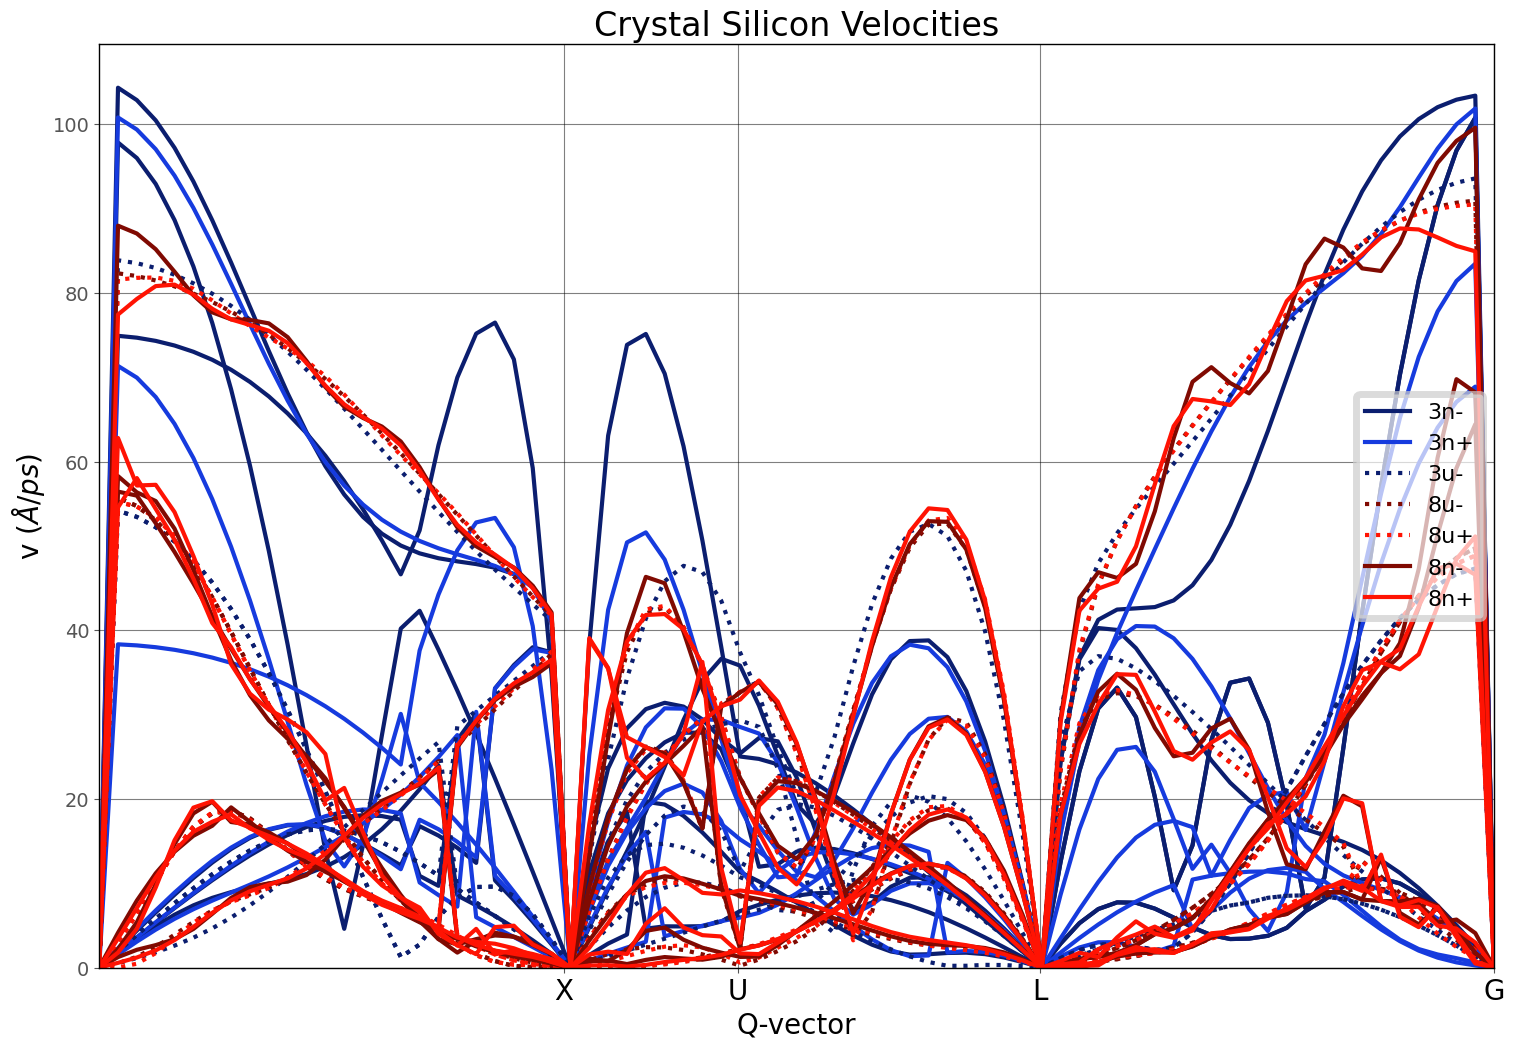

In [9]:
fig = plt.figure(figsize=(18,12))
ax = fig.add_subplot()

subfolder = 'plottable/'

styledic = {
    '3':np.array([22, 59, 222])/255,
    '8':np.array([255, 19, 3])/255,
    '+': 0,
    '-': 0.5,
    'u': ':',
    'n': '-',
}

bmax = 0
lin = []; lab = []
for system in ['3n-', '3n+', '3u-', '8u-', '8u+', '8n-', '8n+']:
    infold = prefix+subfolder+'/'+system+'/dispersion/'
    color = np.array(styledic[system[0]] * (1-styledic[system[2]]))
    ls = styledic[system[1]]
    
    # Load data
    q=np.loadtxt(infold+'q')
    bands=np.loadtxt(infold+'velocity_norm')
    
    # Plot
    ax.plot(q, bands, color=color, linestyle=ls, linewidth=3, label=system)
    lin.append(Line2D([], [], color=color, linestyle=ls, linewidth=3))
    lab.append(system)
    if bands.max()>bmax:
        bmax=bands.max()

ax.legend(lin, lab, loc='center right')
xlabels = np.loadtxt(infold+'point_names', dtype='str')
xticks = np.loadtxt(infold+'Q_val') - 0.02; xticks[-1] +=0.02
#ax.set_yticks([0, 4, 8, 12, 16], [0, 4, 8, 12, 16], color='k', fontsize=18)
ax.set_xticks(xticks, xlabels, fontsize=20, color='k')
ax.grid('x', color='k', alpha=0.5, zorder=-1)
ax.grid('y', 'major', color='k', alpha=0.5, zorder=-1)
ax.set_xlabel('Q-vector', fontsize=20, color='k')
ax.set_ylabel(r'v $(\AA /ps)$', fontsize=20, color='k')
ax.set_xlim([0, 1])
ax.set_ylim([0, bmax*1.05])
ax.set_title('Crystal Silicon Velocities', fontsize=24, color='k')

/tmp/ipykernel_24038/2201752369.py:47: UserWarning: Attempt to set non-positive ylim on a log-scaled axis will be ignored.
  ax.set_ylim([0, ym*1.15])


Text(0.5, 1.0, 'Crystal Silicon Bandwidth')

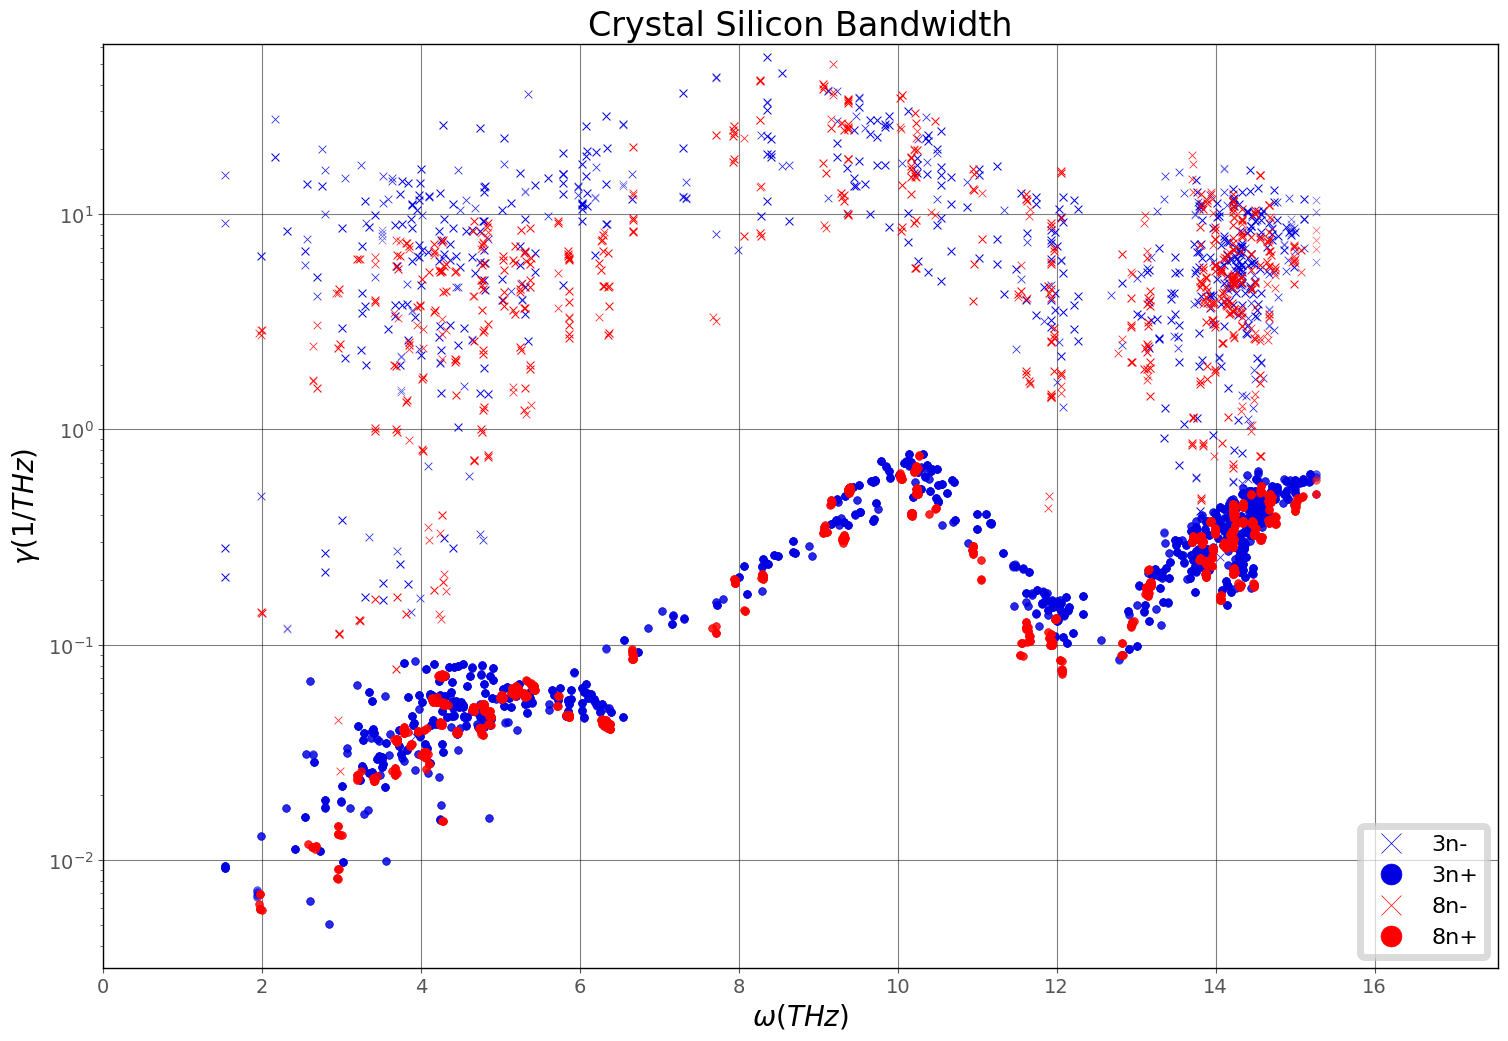

In [7]:
fig = plt.figure(figsize=(18,12))
ax = fig.add_subplot()

subfolder = 'plottable/'
kstr = '7_7_7/'
tempstats = '300/quantum/'
styledic = {
    '3':np.array([0, 0, 225])/255,
    '8':np.array([255, 0, 0])/255,
    'u': 3,
    'n': 0.5,
    '+': 'o',
    '-': 'x',
}
abscicca = 'frequency'
abscicca += '.npy'
ordinate = 'bandwidth'
ordinate += '.npy'

lin = []; lab = []; ym = 0; xm = 0
for system in ['3n-', '3n+', '8n-', '8n+',]:
    infold = prefix+subfolder+system+'/'+kstr
    color = np.array(styledic[system[0]])
    m = styledic[system[2]]
    w = styledic[system[1]]
    
    # Load data
    freq=np.load(infold+abscicca)
    prop=np.load(infold+tempstats+ordinate)
    
    # Plot + label stuff
    ax.scatter(freq, prop, color=color, marker=m, s=30, alpha=0.6, linewidths=w, zorder=1)
    lin.append(Line2D([], [], color=color, marker=m, markeredgewidth=w, linestyle='None'))
    lab.append(system)
    if xm<freq.max():
        xm=freq.max()
    if ym<prop.max():
        ym=prop.max()


ax.grid('x', color='k', alpha=0.5, zorder=0)
ax.grid('y', 'major', color='k', alpha=0.5, zorder=0)
ax.set_yscale('log')
ax.set_xlabel(r'$\omega (THz)$', fontsize=20, color='k')
ax.set_ylabel(r'$\gamma (1/THz)$', fontsize=20, color='k')
ax.set_xlim([0, xm*1.15])
ax.set_ylim([0, ym*1.15])
ax.legend(lin, lab, loc='lower right')
ax.set_title('Crystal Silicon Bandwidth', fontsize=24, color='k')

/tmp/ipykernel_32787/2684054902.py:47: UserWarning: Attempt to set non-positive ylim on a log-scaled axis will be ignored.
  ax.set_ylim([0, ym*1.15])


Text(0.5, 1.0, 'Crystal Silicon Population')

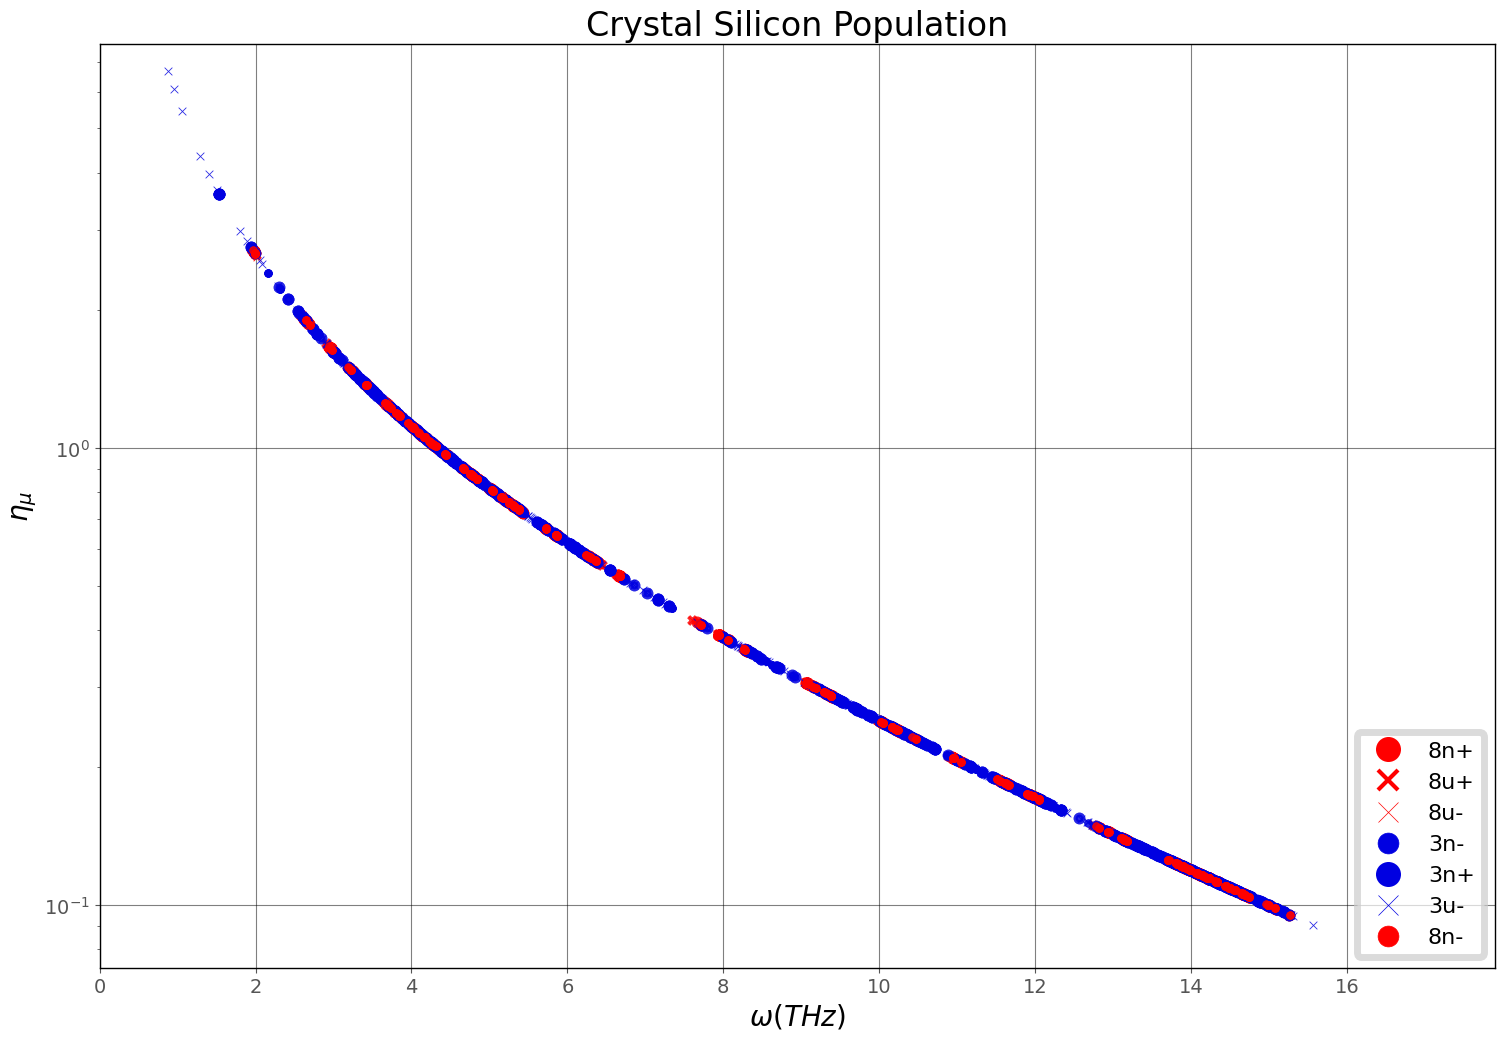

In [12]:
fig = plt.figure(figsize=(18,12))
ax = fig.add_subplot()

subfolder = 'plottable/'
kstr = '7_7_7/'
tempstats = '300/quantum/'
styledic = {
    '3':np.array([0, 0, 225])/255,
    '8':np.array([255, 0, 0])/255,
    'u': 'x',
    'n': 'o',
    '+': 3,
    '-': 0.5,
}
abscicca = 'frequency'
abscicca += '.npy'
ordinate = 'population'
ordinate += '.npy'

lin = []; lab = []; ym = 0; xm = 0
for system in ['8n+', '8u+', '8u-', '3n-', '3n+',  '3u-', '8n-', ]:
    infold = prefix+subfolder+system+'/'+kstr
    color = np.array(styledic[system[0]])
    m = styledic[system[1]]
    w = styledic[system[2]]
    
    # Load data
    freq=np.load(infold+abscicca)
    prop=np.load(infold+tempstats+ordinate)
    
    # Plot + label stuff
    ax.scatter(freq, prop, color=color, marker=m, s=30, alpha=0.6, linewidths=w, zorder=1)
    lin.append(Line2D([], [], color=color, marker=m, markeredgewidth=w, linestyle='None'))
    lab.append(system)
    if xm<freq.max():
        xm=freq.max()
    if ym<prop.max():
        ym=prop.max()


ax.grid('x', color='k', alpha=0.5, zorder=0)
ax.grid('y', 'major', color='k', alpha=0.5, zorder=0)
ax.set_yscale('log')
ax.set_xlabel(r'$\omega (THz)$', fontsize=20, color='k')
ax.set_ylabel(r'$\eta_{\mu}$', fontsize=20, color='k')
ax.set_xlim([0, xm*1.15])
ax.set_ylim([0, ym*1.15])
ax.legend(lin, lab, loc='lower right')
ax.set_title('Crystal Silicon Population', fontsize=24, color='k')

/tmp/ipykernel_32787/2094019033.py:47: UserWarning: Attempt to set non-positive ylim on a log-scaled axis will be ignored.
  ax.set_ylim([0, ym*1.15])


Text(0.5, 1.0, 'Crystal Silicon - Phase Space')

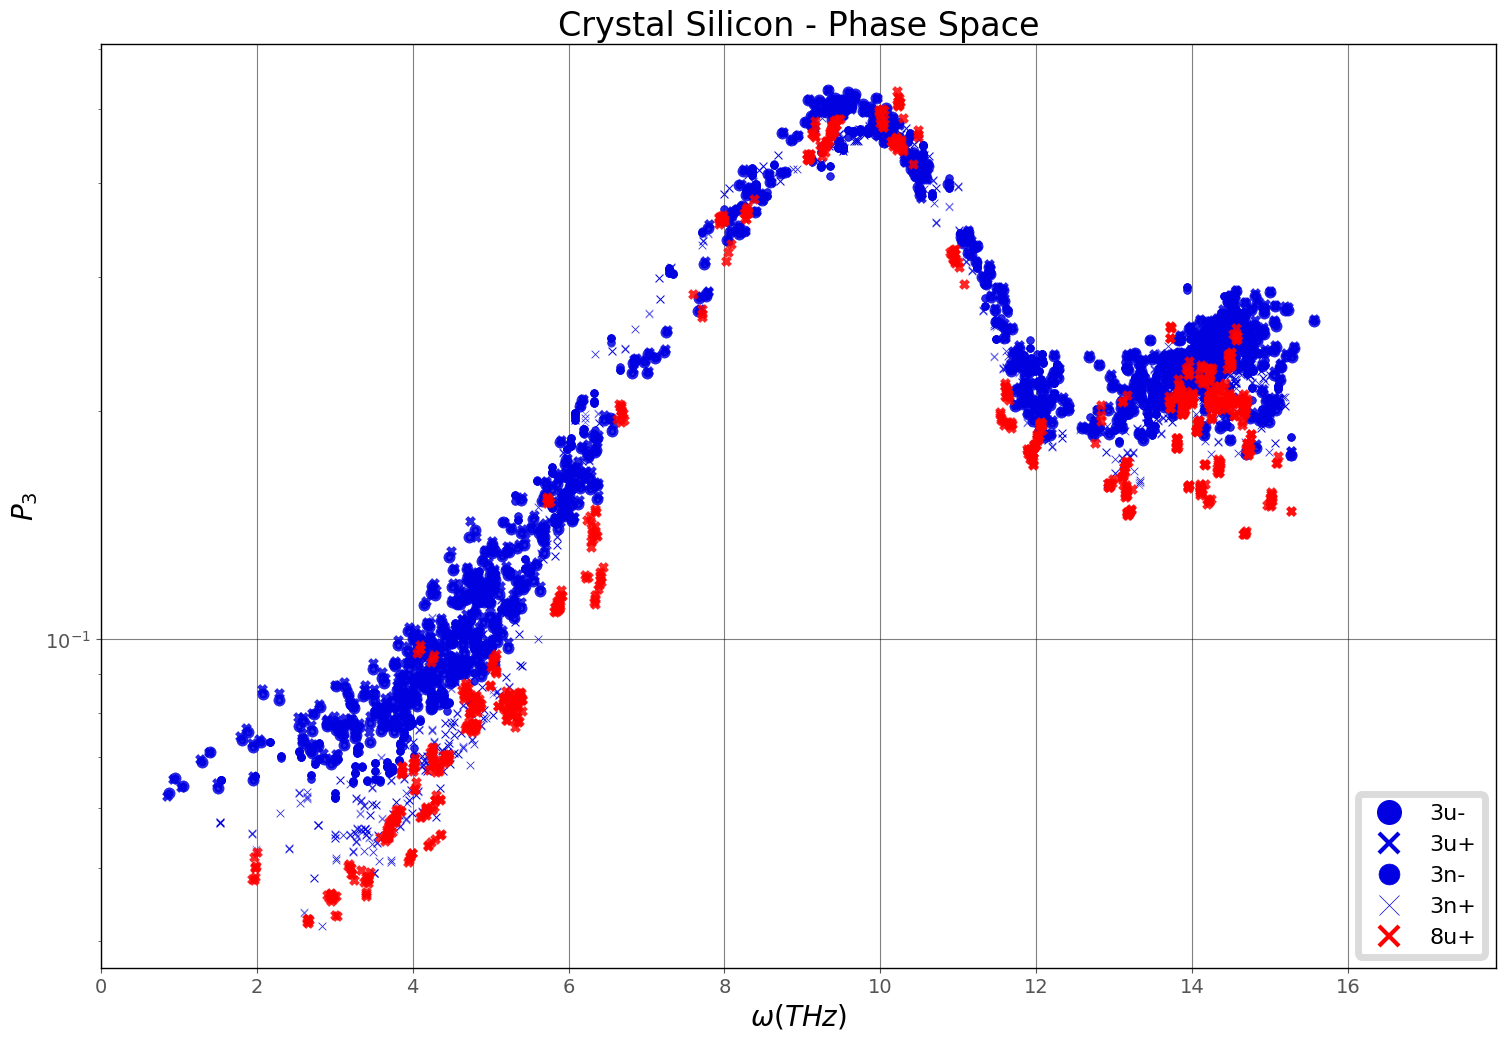

In [18]:
fig = plt.figure(figsize=(18,12))
ax = fig.add_subplot()

subfolder = 'plottable/'
kstr = '7_7_7/'
tempstats = '300/quantum/'
styledic = {
    '3':np.array([0, 0, 225])/255,
    '8':np.array([255, 0, 0])/255,
    'u': 3,
    'n': 0.5,
    '+': 'x',
    '-': 'o',
}
abscicca = 'frequency'
abscicca += '.npy'
ordinate = '_ps_and_gamma'
ordinate += '.npy'

lin = []; lab = []; ym = 0; xm = 0
for system in ['3u-', '3u+', '3n-', '3n+', '8u+']:
    infold = prefix+subfolder+system+'/'+kstr
    color = np.array(styledic[system[0]])
    m = styledic[system[2]]
    w = styledic[system[1]]
    
    # Load data
    freq=np.load(infold+abscicca)
    prop=np.load(infold+tempstats+ordinate)[:, 0].reshape(7*7*7, 6)

    # Plot + label stuff
    ax.scatter(freq, prop, color=color, marker=m, s=30, alpha=0.6, linewidths=w, zorder=1)
    lin.append(Line2D([], [], color=color, marker=m, markeredgewidth=w, linestyle='None'))
    lab.append(system)
    if xm<freq.max():
        xm=freq.max()
    if ym<prop.max():
        ym=prop.max()


ax.grid('x', color='k', alpha=0.5, zorder=0)
ax.grid('y', 'major', color='k', alpha=0.5, zorder=0)
ax.set_yscale('log')
ax.set_xlabel(r'$\omega (THz)$', fontsize=20, color='k')
ax.set_ylabel(r'$P_{3}$', fontsize=20, color='k')
ax.set_xlim([0, xm*1.15])
ax.set_ylim([0, ym*1.15])
ax.legend(lin, lab, loc='lower right')
ax.set_title('Crystal Silicon - Phase Space', fontsize=24, color='k')

/tmp/ipykernel_32787/2413108357.py:47: UserWarning: Attempt to set non-positive ylim on a log-scaled axis will be ignored.
  ax.set_ylim([0, ym*1.15])


Text(0.5, 1.0, 'Crystal Silicon Population')

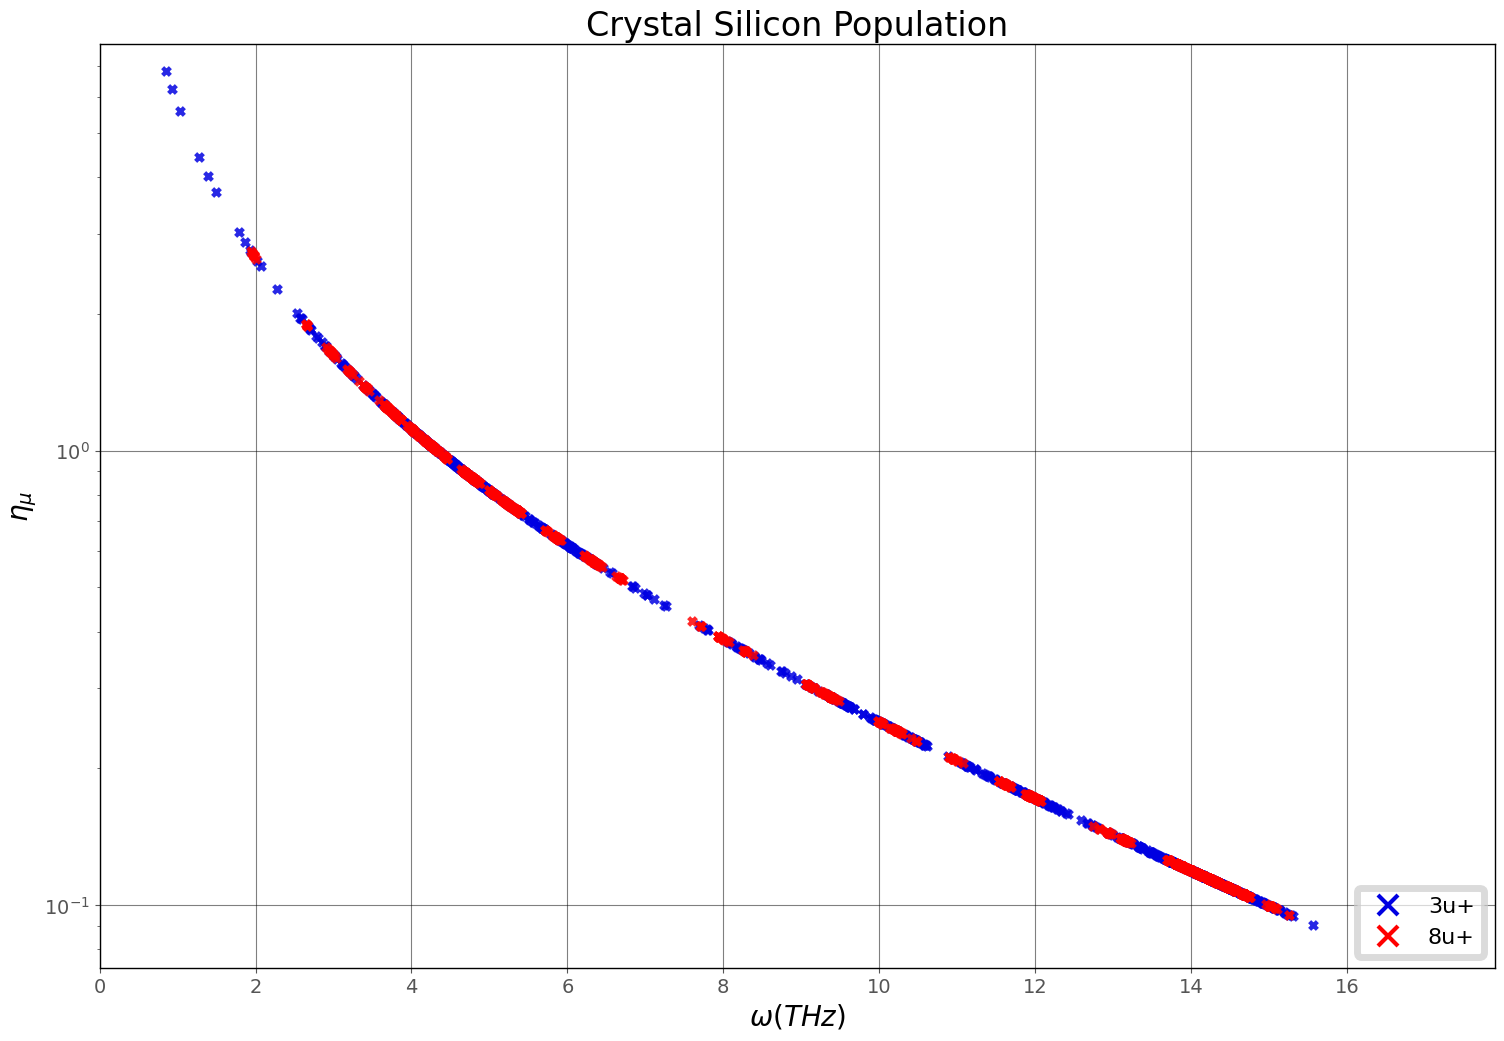

In [22]:
fig = plt.figure(figsize=(18,12))
ax = fig.add_subplot()

subfolder = 'plottable/'
kstr = '7_7_7/'
tempstats = '300/quantum/'
styledic = {
    '3':np.array([0, 0, 225])/255,
    '8':np.array([255, 0, 0])/255,
    'u': 'x',
    'n': 'o',
    '+': 3,
    '-': 0.5,
}
abscicca = 'frequency'
abscicca += '.npy'
ordinate = 'population'
ordinate += '.npy'

lin = []; lab = []; ym = 0; xm = 0
for system in ['3u-', '3u+', '3n-', '3n+', '8u+']:
    infold = prefix+subfolder+system+'/'+kstr
    color = np.array(styledic[system[0]])
    m = styledic[system[1]]
    w = styledic[system[2]]
    
    # Load data
    freq=np.load(infold+abscicca)
    prop=np.load(infold+tempstats+ordinate)

    # Plot + label stuff
    ax.scatter(freq, prop, color=color, marker=m, s=30, alpha=0.6, linewidths=w, zorder=1)
    lin.append(Line2D([], [], color=color, marker=m, markeredgewidth=w, linestyle='None'))
    lab.append(system)
    if xm<freq.max():
        xm=freq.max()
    if ym<prop.max():
        ym=prop.max()


ax.grid('x', color='k', alpha=0.5, zorder=0)
ax.grid('y', 'major', color='k', alpha=0.5, zorder=0)
ax.set_yscale('log')
ax.set_xlabel(r'$\omega (THz)$', fontsize=20, color='k')
ax.set_ylabel(r'$\eta_{\mu}$', fontsize=20, color='k')
ax.set_xlim([0, xm*1.15])
ax.set_ylim([0, ym*1.15])
ax.legend(lin, lab, loc='lower right')
ax.set_title('Crystal Silicon Population', fontsize=24, color='k')

/tmp/ipykernel_32787/1104372894.py:47: UserWarning: Attempt to set non-positive ylim on a log-scaled axis will be ignored.
  ax.set_ylim([0, ym*1.15])


Text(0.5, 1.0, 'Crystal Silicon Population')

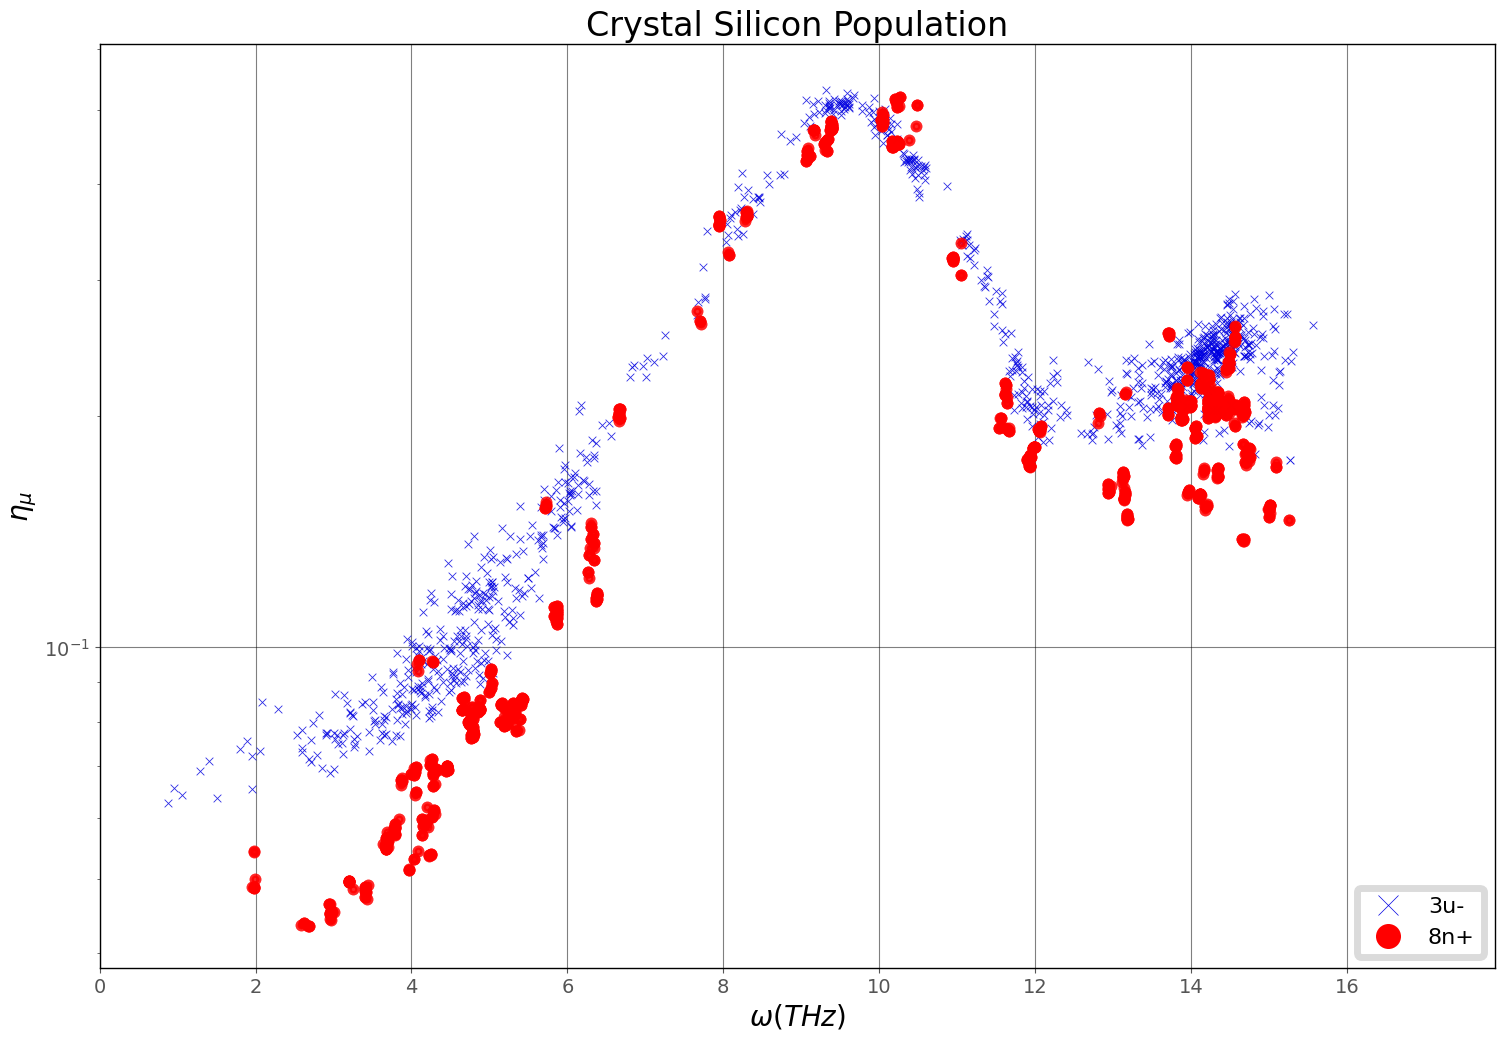

In [10]:
fig = plt.figure(figsize=(18,12))
ax = fig.add_subplot()

subfolder = 'plottable/'
kstr = '7_7_7/'
tempstats = '300/quantum/'
styledic = {
    '3':np.array([0, 0, 225])/255,
    '8':np.array([255, 0, 0])/255,
    'u': 'x',
    'n': 'o',
    '+': 3,
    '-': 0.5,
}
abscicca = 'frequency'
abscicca += '.npy'
ordinate = '_ps_and_gamma'
ordinate += '.npy'

lin = []; lab = []; ym = 0; xm = 0
for system in ['3u-', '8n+']:
    infold = prefix+subfolder+system+'/'+kstr
    color = np.array(styledic[system[0]])
    m = styledic[system[1]]
    w = styledic[system[2]]
    
    # Load data
    freq=np.load(infold+abscicca)
    prop=np.load(infold+tempstats+ordinate)[:, 0].reshape(7*7*7, 6)

    # Plot + label stuff
    ax.scatter(freq, prop, color=color, marker=m, s=30, alpha=0.6, linewidths=w, zorder=1)
    lin.append(Line2D([], [], color=color, marker=m, markeredgewidth=w, linestyle='None'))
    lab.append(system)
    if xm<freq.max():
        xm=freq.max()
    if ym<prop.max():
        ym=prop.max()


ax.grid('x', color='k', alpha=0.5, zorder=0)
ax.grid('y', 'major', color='k', alpha=0.5, zorder=0)
ax.set_yscale('log')
ax.set_xlabel(r'$\omega (THz)$', fontsize=20, color='k')
ax.set_ylabel(r'$\eta_{\mu}$', fontsize=20, color='k')
ax.set_xlim([0, xm*1.15])
ax.set_ylim([0, ym*1.15])
ax.legend(lin, lab, loc='lower right')
ax.set_title('Crystal Silicon Population', fontsize=24, color='k')

In [ ]:
md_prefix = 'greenkubo/'

def run_autocorrelation()
    for i in np.range(4):
        indir = prefix+dir
        print('\n\nworking on '+indir)
        atoms = read(indir+'/model.xyz')
        T = pd.read_csv(indir+'/thermo.out', delim_whitespace=True, header=None).to_numpy()[-1, 0]
        nl = neighbor_list('i', atoms, VDWCUTOFF)
        fourcoord = np.sum(np.bincount(nl)==4)
        sp3frac = fourcoord / len(atoms)

        pressure = int(dir.split('GPa')[0])
        gen = int(dir.split('-')[1])
        volume = atoms.get_volume()
        density = 1.6605*atoms.get_masses().sum()/volume

        try:
            data = pd.read_csv(indir+'/compute.out', delim_whitespace=True, header=None).to_numpy()
        except:
            print('error on this dir')
            continue
        jx = (data[:,0] + data[:,3])
        jy = (data[:,1] + data[:,4])
        jz = (data[:,2] + data[:,5])

        # Autocorrelation
        print('\n\tAutocorrelating...')
        t1 = time()
        nsteps = jx.size
        denominator = np.flip(np.arange(nsteps)+1)[:maxcorrsteps]
        autocorr[:,0] = spcorr(jx, jx, mode='full')[-nsteps: -(nsteps-maxcorrsteps)] / denominator
        autocorr[:,1] = spcorr(jy, jy, mode='full')[-nsteps: -(nsteps-maxcorrsteps)] / denominator
        autocorr[:,2] = spcorr(jz, jz, mode='full')[-nsteps: -(nsteps-maxcorrsteps)] / denominator
        t2 = time()
        print('\tDone!')
        print('Total time for autocorrelation calc: {} min'.format((t2-t1)/60))

        plotdata[i, ...] = NAME, pressure, gen, density, sp3frac, volume, T, autocorr[:,0], autocorr>

        print('\tsaving to {}'.format(indir+'/fluxcorrelation.npy'))
        np.save(indir+'/fluxcorrelation.npy', autocorr)

    print('Directory {} processed, saving to {}'.format(path, savepath))
np.save(savepath, plotdata)



In [15]:
import h5py
import numpy as np
import pandas as pd
from scipy.signal import correlate as spcorr
from ase.io import read

prefix = '../silicon/greenkubo/'
MAX_AC_STEP = 100000


def autocorrelate_gpumd(fin, fout, max_ac_step=MAX_AC_STEP):
    # fin (str) - name of csv file with heat flux
    # fout (str) - where to store npy file
    flux = pd.read_csv(fin, delim_whitespace=True, header=None).to_numpy()
    jx = (flux[:,0] + flux[:,3])
    jy = (flux[:,1] + flux[:,4])
    jz = (flux[:,2] + flux[:,5])
    
    nsteps = jx.size
    denominator = np.flip(np.arange(nsteps+1))[:max_ac_step]
    autocorrx = spcorr(jx, jx, mode='full')[-nsteps:(-nsteps + max_ac_step)] / denominator
    autocorry = spcorr(jy, jy, mode='full')[-nsteps:(-nsteps + max_ac_step)] / denominator
    autocorrz = spcorr(jz, jz, mode='full')[-nsteps:(-nsteps + max_ac_step)] / denominator
    autocorr = np.vstack([autocorrx, autocorry, autocorrz])
    
    np.save(fout, autocorr)
    return autocorr
    #store_hdf5.create_dataset(name='nve1', data=autocorr)

    
def integrate_gk(hac, T, V, fout, dt=0.5):
    scaling = (1 / ((T ** 2) * V))
    scaling *= (1.602176634e-19 * 9.651599e7) * (1. / 1e15) * (1e30 / 8.617333262145e-5)
    traps = dt * scaling * (hac+np.roll(hac, shift=-1, axis=1)) / 2
    gk = np.cumsum(traps, axis=1)
    np.save(fout, gk)
    return gk
    
#ac_group = archive.create_group('autocorrelation', shape=(3, MAX_AC_STEP), dtype=np.float16)
#autocorrelate_gpumd(prefix+'1.nve/compute.out', store_hdf5=ac_group)
#archive = h5py.File(prefix+'calculated.hdf5', mode='a')
#ac_group = archive.get('autocorrelation')
#data = ac_group.get('nve1')
# gk_group = archive.create_group('greenkubo')
# try:
#     gk_group = archive.create_group('greenkubo', shape=(3, MAX_AC_STEP), dtype=np.float16)
# except:
#     gk_group = archive.get('greenkubo', )

runs = 4
averager = np.zeros((4, 3, MAX_AC_STEP))
for irun in range(runs):
    prefix = f'../silicon/greenkubo/{irun+1}.nve'
    volume = read(prefix+'/model.xyz').get_volume()
    temp = 300
    try:
        hac = np.load(prefix+'/hac.npy')
    except:
        flux_fn = prefix+'/compute.out'
        hac = autocorrelate_gpumd(flux_fn, prefix+'/hac.npy', max_ac_step=MAX_AC_STEP)
    averager[irun, ...] = integrate_gk(hac, temp, volume, prefix+'/gk.npy', dt=0.5)
mean = averager.mean(axis=(0,1))
std = averager.std(axis=(0,1))
np.save('../silicon/greenkubo/gk_bar.npy', np.vstack((mean, std)))

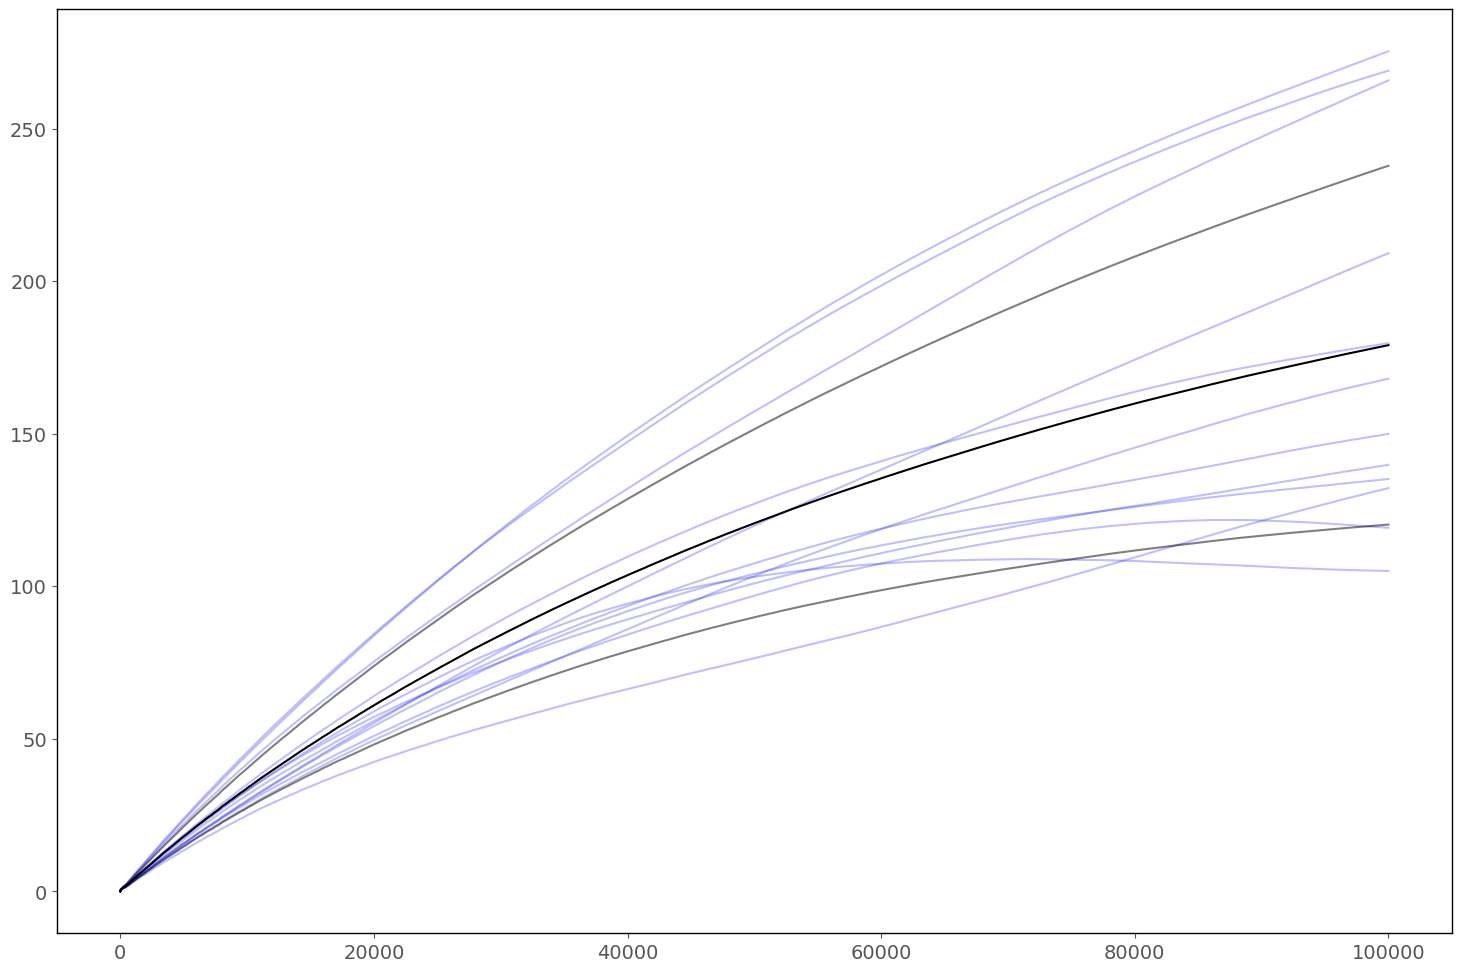

In [22]:
fig = plt.figure(figsize=(18,12))
ax = fig.add_subplot()

workingfolder = '../silicon/greenkubo'
for irun in range(4):
    prefix = workingfolder+f'/{irun+1}.nve'
    gk = np.load(prefix+'/gk.npy')
    corrtime = np.arange(gk.shape[1])
    ax.plot(corrtime, gk[0, :], color='b', alpha=0.25)
    ax.plot(corrtime, gk[1, :], color='b', alpha=0.25)
    ax.plot(corrtime, gk[2, :], color='b', alpha=0.25)

gk_finaldata = np.load(workingfolder+'/gk_bar.npy')
gk_bar = gk_finaldata[0, :]
gk_std = gk_finaldata[1, :]
corrtime = np.arange(gk_bar.size)
ax.plot(corrtime, gk_bar+gk_std, color='k', alpha=0.5)
ax.plot(corrtime, gk_bar-gk_std, color='k', alpha=0.5)
ax.plot(corrtime, gk_bar, color='k', alpha=1)

In [29]:
def integrate_he_fast(hac, T, V, fout, dt=0.5):
    ###
    # If max correlation time is N
    # Requires ( N**2 
    scaling = (1 / ((T ** 2) * V))
    scaling *= (1.602176634e-19 * 9.651599e7) * (1. / 1e15) * (1e30 / 8.617333262145e-5)
    
    tau = np.triu(np.ones((hac.shape[1], hac.shape[1]), dtype=np.uint16)).T
    tauy = np.array(np.arange(hac.shape[1], dtype=np.uint16)+1, ndmin=2)
    taui = (tau.T*(tauy+1)).T
    tauj = tau*tauy
    tau = (1/tauy.T) * taui-tauj
    taui, tauj = None, None, None
    del taui, tauj
    
    traps = dt * scaling * (hac+np.roll(hac, shift=-1, axis=1)) / 2
    he = traps @ tau.T
    np.save(fout, he)
    return he

In [30]:
runs = 4
averager = np.zeros((4, 3, MAX_AC_STEP))
for irun in range(runs):
    prefix = f'../silicon/greenkubo/{irun+1}.nve'
    volume = read(prefix+'/model.xyz').get_volume()
    temp = 300
    try:
        hac = np.load(prefix+'/hac.npy')
    except:
        flux_fn = prefix+'/compute.out'
        hac = autocorrelate_gpumd(flux_fn, prefix+'/hac.npy', max_ac_step=MAX_AC_STEP)
    averager[irun, ...] = integrate_he(hac, temp, volume, prefix+'/gk.npy', dt=0.5)
mean = averager.mean(axis=(0,1))
std = averager.std(axis=(0,1))
np.save('../silicon/greenkubo/he_bar.npy', np.vstack((mean, std)))

MemoryError: Unable to allocate 74.5 GiB for an array with shape (100000, 100000) and data type float64

In [ ]:
fig = plt.figure(figsize=(18,12))
ax = fig.add_subplot()

workingfolder = '../silicon/greenkubo'
for irun in range(4):
    prefix = workingfolder+f'/{irun+1}.nve'
    gk = np.load(prefix+'/gk.npy')
    corrtime = np.arange(gk.shape[1])
    ax.plot(corrtime, gk[0, :], color='b', alpha=0.25)
    ax.plot(corrtime, gk[1, :], color='b', alpha=0.25)
    ax.plot(corrtime, gk[2, :], color='b', alpha=0.25)

gk_finaldata = np.load(workingfolder+'/gk_bar.npy')
gk_bar = gk_finaldata[0, :]
gk_std = gk_finaldata[1, :]
corrtime = np.arange(gk_bar.size)
ax.plot(corrtime, gk_bar+gk_std, color='k', alpha=0.5)
ax.plot(corrtime, gk_bar-gk_std, color='k', alpha=0.5)
ax.plot(corrtime, gk_bar, color='k', alpha=1)